# Assignment -1
## GDP Analysis
### PART I A



In [121]:
# Plot a graph for rows " % Growth over previous year" for all the states (not union territories)
#import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
############Data-Sourcing################

#Read the CSV file 
df=pd.read_csv("data1_A_download.csv")

############Data-Cleaning################

#1.Drop invalid values(NA) by removing row having more than 50% of NA values
df=df.dropna(thresh=18)

#2. Strip leading and trailing spaces
df.columns=df.columns.str.strip() 
cols=list(df.select_dtypes(include=["object"]).columns) 
df[cols].apply(lambda x:x.str.strip(""))

#3.Remove the union territories
df=df.drop(['Chandigarh','Andaman & Nicobar Islands','Delhi','Puducherry'],axis=1)

#4.Remove columns having NA values in all rows
df.dropna(axis=1,how='all',inplace=True)

#################Data-Analysis##################################

#Get the records for '% Growth over previous year' by grouping
df_GOPY=df.groupby("Items  Description").get_group('(% Growth over previous year)')
df_GOPY=df_GOPY.drop("Items  Description",axis=1)
df_GOPY.set_index("Duration",inplace=True)
df_GOPY=df_GOPY.T
df_GOPY['AvgGOPY']=round(df_GOPY.mean(axis=1,skipna=True),2)
df_GOPY.sort_values(by=['AvgGOPY'],inplace=True)
print(df_GOPY.head())


Duration         2012-13  2013-14  2014-15  2015-16  AvgGOPY
Goa               -10.02    -5.77    13.12    10.75     2.02
Meghalaya           9.81     4.87     6.41     9.58     7.67
Sikkim             10.51    12.35     9.72     9.39    10.49
Odisha             13.34    12.95    10.37     6.19    10.71
Jammu & Kashmir    11.31    10.09     4.70    17.91    11.00


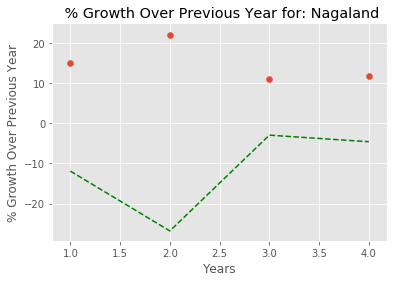

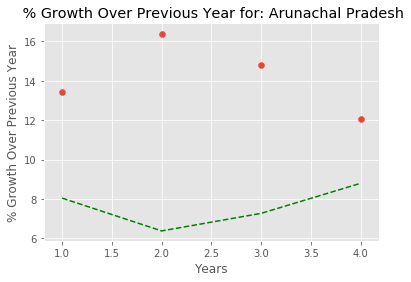

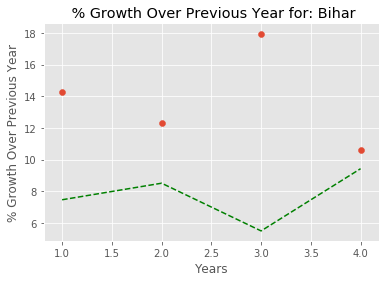

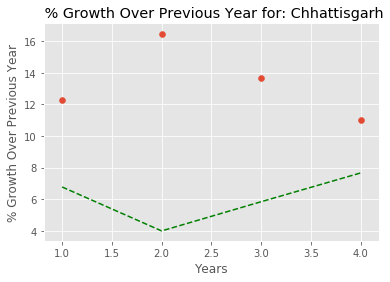

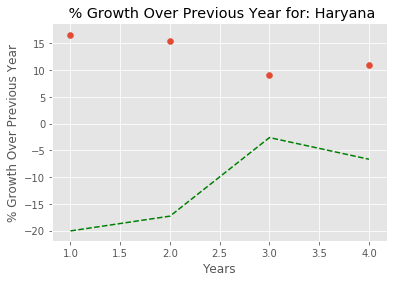

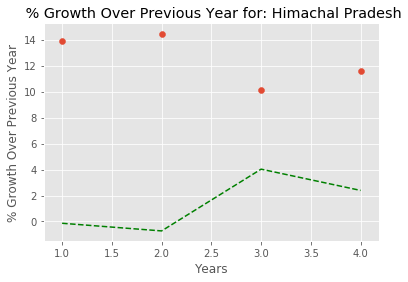

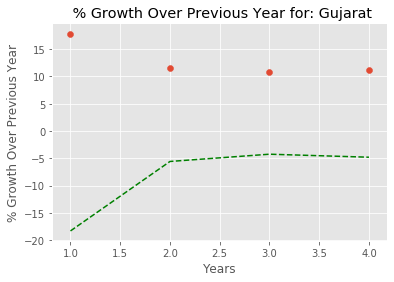

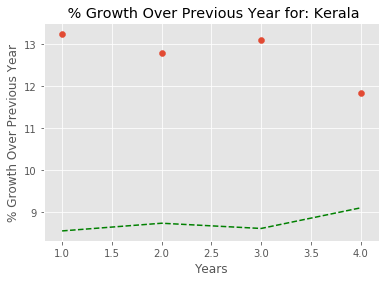

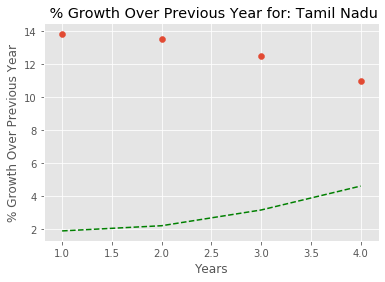

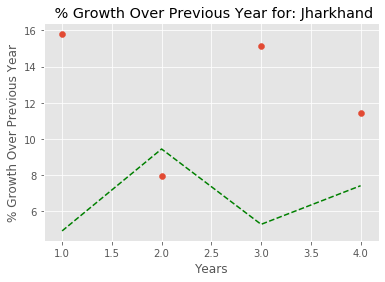

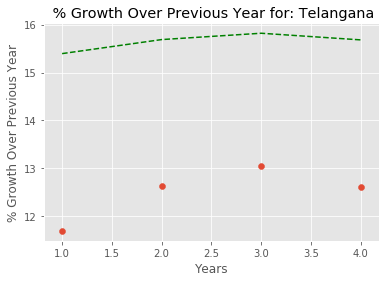

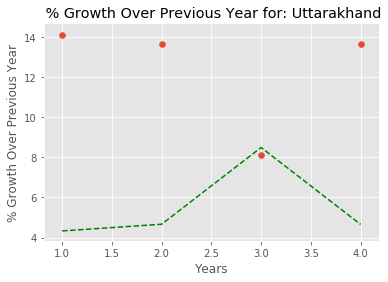

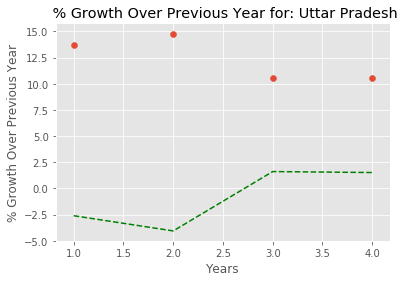

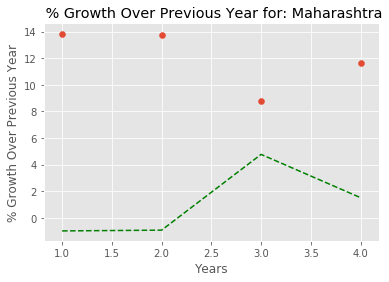

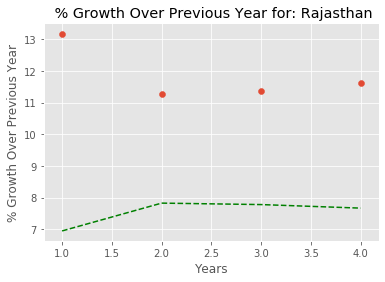

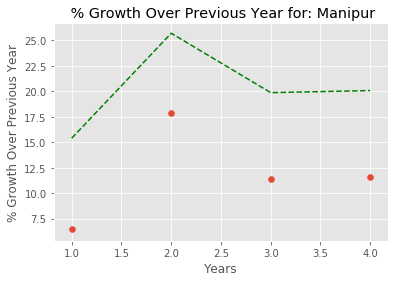

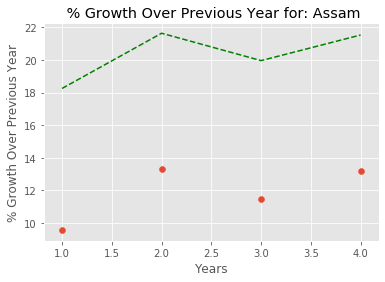

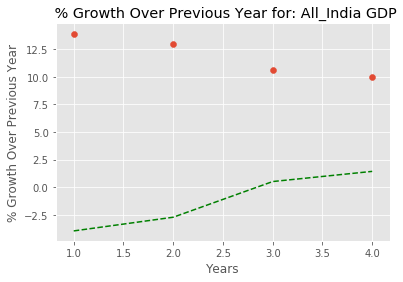

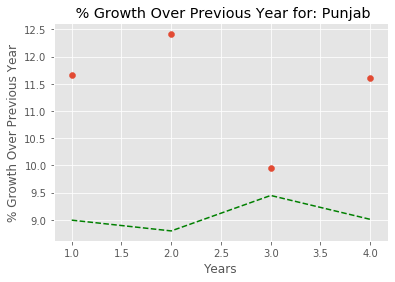

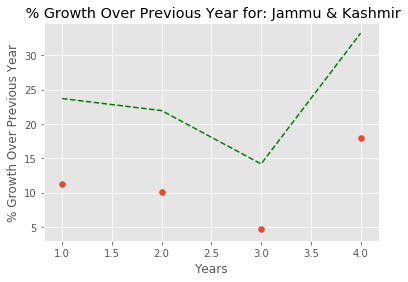

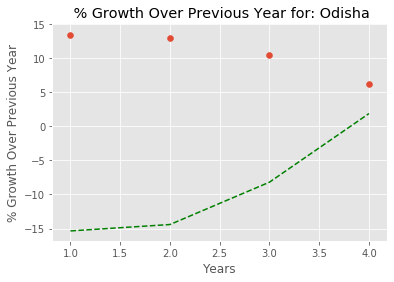

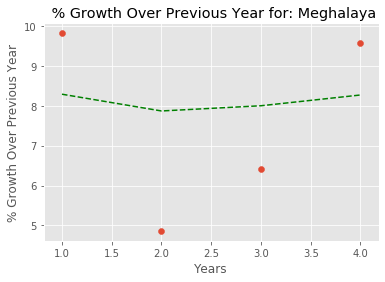

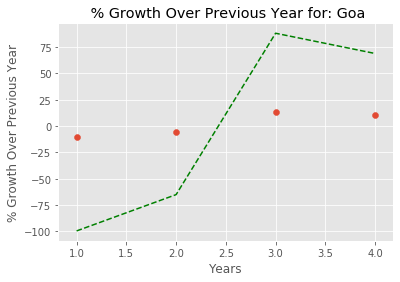

In [122]:
#Plotting the best fit line to represent the growth for each state.
import sys
df_GOPY1=df_GOPY
df_GOPY1.fillna(df_GOPY1.mean(),inplace=True)
df_GOPY1=df_GOPY1.sort_values('AvgGOPY',ascending=False)
df_GOPY1=df_GOPY1.drop("AvgGOPY",axis=1)
col_list_len=[1,2,3,4]
df_states=df_GOPY1.index
for i in range(0,len(df_GOPY1)):
    x,y=col_list_len,df_GOPY1.iloc[i]
    m,c=np.polyfit(x,y,1)
    plt.plot(x,(m*y)+c,'--g')    
    plt.scatter(x,y)
    plt.xlabel('Years')
    plt.ylabel('% Growth Over Previous Year')
    plt.title(" % Growth Over Previous Year for: "+df_states[i])    
    plt.show()

In [123]:

#Draw a similar line graph for the nation 
x,y=col_list_len,df_GOPY1.iloc[6]
m,c=np.polyfit(x,y,1)
plt.plot(x,(m*y)+c,'--b')    
plt.scatter(x,y)
plt.xlabel('Years')
plt.ylabel('% Growth Over Previous Year')
plt.title(" % Growth Over Previous Year For The Nation ")    
plt.show()

In [147]:
#Compare the growth rates of any two states
#To compare the growth rate of any 2 states we use line graph which shares the y axis.

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

#Subplot for the 1st state
x,y=col_list_len,df_GOPY1.iloc[2]
m,c=np.polyfit(x,y,1)
ax1.plot(x,(m*y)+c,'--b')    
ax1.scatter(x,y)
ax1.set(xlabel='Year for '+df_states[2], ylabel='% Growth Over Previous Year')
ax1.set_title("% Growth Over Previous Year For: "+df_states[2]+" VS "+df_states[3])    

#Subplot for the 2nd state
i,j=col_list_len,df_GOPY1.iloc[3]
a,b=np.polyfit(x,y,1)
ax2.plot(i,(a*j)+b,'--g')    
ax2.scatter(i,j)
ax2.set(xlabel='Year for '+df_states[3])

plt.show()

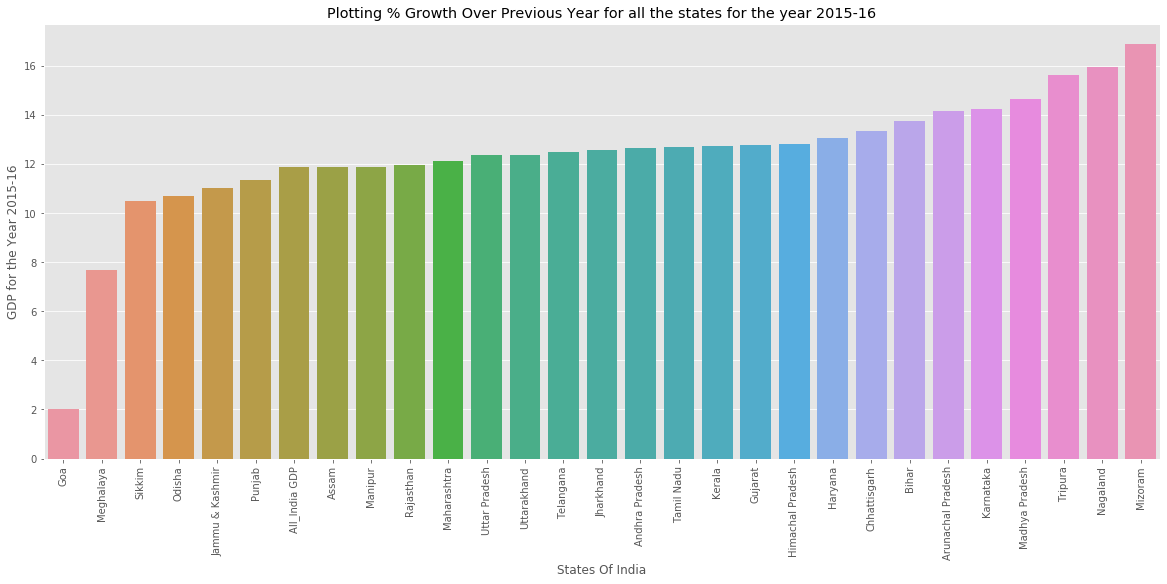

In [124]:
#Rank top 3 fastest and 3 slowest-growing states
#To determine this, we plot the bar plot for all the states against the GDP of each state
import seaborn as sns
plt.figure(figsize=(20,8)) 
df_GOPY=df_GOPY.sort_values("AvgGOPY")
avg=df_GOPY['AvgGOPY']
sns.barplot(df_GOPY.index,avg) 
plt.xticks(rotation=90)
plt.xlabel('States Of India')
plt.ylabel('GDP for the Year 2015-16')
plt.title("Plotting % Growth Over Previous Year for all the states for the year 2015-16")

plt.show()

From the above graph we can infer that the top 3 states would be:<br/>
Top 3 states:<br/>
    1) Mizoram<br/>
    2) Nagaland<br/>
    3) Tripura<br/>
Slowest 3 states:<br/>
    1) Goa<br/>
    2) Meghalaya<br/>
    3) Sikkim<br/>
**Nation's growth Rate :  11.87<br/>**
**My home state is Tamil Nadu and its growth Rate is:  12.71<br/>**
So my home state Growth Rate is slightly higher than the nation's growth rate. This implies that my home state and the nation's growth are almost in the same pattern which in turn makes it clear that my state's behaviour and reaction towards the nation wide policies is almost similar to the all India reaction<br/><br/>
<u><b>Plot the total GDP of the states for the year 2015-16</b></u><br/>
<br/>

It would be better to use bar graph for this since we can easily compare multiple state's GDP in this plot.


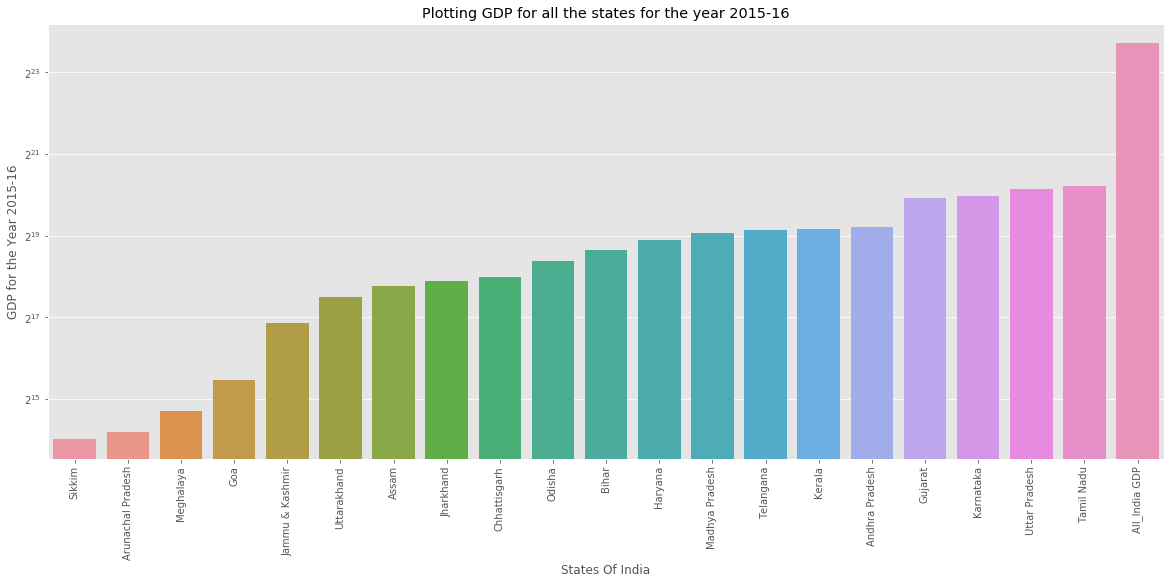

In [125]:
#Plot the total GDP of the states for the year 2015-16
#Here the bar plot is chosen because we can clearly see the total GDP distribution for all the states for the year 2015-16 in bar form easily.

#Get the records related to  'GSDP - CURRENT PRICES (` in Crore)' by grouping and getting the specific groups
GDP15_16=df.groupby("Items  Description").get_group( 'GSDP - CURRENT PRICES (` in Crore)')
GDP15_16=GDP15_16[GDP15_16["Duration"]=='2015-16']

#############Data Cleansing##########################
GDP15_16=GDP15_16.drop("Items  Description",axis=1)
GDP15_16=GDP15_16.dropna(thresh=1)
GDP15_16.set_index("Duration",inplace=True)
GDP15_16=GDP15_16.T
GDP15_16=GDP15_16.dropna()
GDP15_16.sort_values(by=['2015-16'],inplace=True) 

##############Seaborn plot###########################
import seaborn as sns
plt.figure(figsize=(20,8)) 
sns.barplot(GDP15_16.index,GDP15_16["2015-16"]) 
plt.xticks(rotation=90)
plt.xlabel('States Of India')
plt.yscale('log',basey=2)
plt.ylabel('GDP for the Year 2015-16')
plt.title("Plotting GDP for all the states for the year 2015-16")
plt.show() 


From the above graph we can infer the following:<br/>

**Top 3 states:**<br/>
    1) Tamil Nadu<br/>
    2) Uttar Pradesh<br/>
    3) Karnataka<br/>
**Bottom 3 states:**<br/>
    1) Sikkim<br/>
    2) Arunachal Pradesh<br/>
    3) Meghalaya<br/>

<br/>
<br/>
<br/>

<b>#Insights that can be drawn from the above graph:</b>
<br/>

From the graphs, one interesting insight is that those states that are located in the North-East are having Low Growth Rate and Southern states have more probability of having a good growth rate. The factors causing such a trend needs to be further analysed, before we could conclude anything on this. Those factors could be geographical, climatic, political or economical or the combination of these.


# Plot  1B
## Categorical data analysis


In [126]:

#Merge all the states data:
import pandas as pd
import glob,os
##########Data Sourcing#################
path=r"C:\\state wise GSVA\\"
all_files = [f for f in glob.glob(path + "**/*.csv", recursive=True)]
li=[]
for filename in all_files:
    df_state=pd.read_csv(filename,index_col=False,header=0,encoding='cp1252', converters={"Command0": lambda x: int(x, 16)}) 
    #Keep only the records for the year '2014-15'
    df_state=df_state[['Item','2014-15']]
    #Remove the Sub-Sub Sectors and Other unnecessary columns
    sector_list=['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
    'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services',
    'Real estate, ownership of dwelling & professional services','Public administration','Other services','Primary','Secondary','Tertiary',
    'Gross State Domestic Product','Population (\'00)','Per Capita GSDP (Rs.)']
    
    df_state=df_state[df_state['Item'].isin(sector_list) ]
    
    df_state=df_state.T
    #Remove Header
    new_Header=df_state.iloc[0]
    df_state=df_state[1:]
    #Add Header
    df_state.columns=new_Header
    #add section
    df_state['section']=filename.split('\\')[-1].split('.')[0].split('-')[1]
    li.append(df_state)
df_final=pd.concat(li,axis=0,ignore_index=True)
df_final.set_index('section',drop=True,inplace=True)

#############Data Cleaning###################################

#Treat NAN Values
df_final.fillna(df_final.mean(),inplace=True)
#Treat the datatypes
df_final=df_final[sector_list].apply(lambda x:pd.to_numeric(x,downcast='integer'))
#Remove the union territories
df_final=df_final.drop(['Chandigarh','Andaman_Nicobar_Islands','Delhi','Puducherry'])
df_final.head()

Item               Agriculture, forestry and fishing  Mining and quarrying  \
section                                                                      
Andhra_Pradesh                              14819416             1484300.0   
Arunachal_Pradesh                             686117               30842.0   
Assam                                        3855548             1471149.0   
Bihar                                        7951890               68107.0   
Chhattisgarh                                 3948847             2451970.0   

Item               Manufacturing  \
section                            
Andhra_Pradesh           4672266   
Arunachal_Pradesh          26120   
Assam                    2002936   
Bihar                    2189965   
Chhattisgarh             4370593   

Item               Electricity, gas, water supply & other utility services  \
section                                                                      
Andhra_Pradesh                                               1151729         
Arunachal_Pradesh                                             113527         
Assam                                                         296587         
Bihar                                                         345168         
Chhattisgarh                                                 1198438         

Item               Construction  Trade, repair, hotels and restaurants  \
section                                                                  
Andhra_Pradesh          4664889                                4233400   
Arunachal_Pradesh        147842                                  60421   
Assam                   1733568                                2987155   
Bihar                   3449763                                7448373   
Chhattisgarh            2669855                                1535571   

Item               Transport, storage, communication & services related to broadcasting  \
section                                                                                   
Andhra_Pradesh                                               5076984                      
Arunachal_Pradesh                                              35203                      
Assam                                                        1194568                      
Bihar                                                        3147173                      
Chhattisgarh                                                  871770                      

Item               Financial services  \
section                                 
Andhra_Pradesh                1900863   
Arunachal_Pradesh               25207   
Assam                          543651   
Bihar                         1178022   
Chhattisgarh                   739057   

Item               Real estate, ownership of dwelling & professional services  \
section                                                                         
Andhra_Pradesh                                               4405409            
Arunachal_Pradesh                                              48418            
Assam                                                        1412466            
Bihar                                                        3740641            
Chhattisgarh                                                 2462166            

Item               Public administration  Other services   Primary  Secondary  \
section                                                                         
Andhra_Pradesh                   2200897         4215389  16303716   10488884   
Arunachal_Pradesh                 243867          218728    716959     287489   
Assam                            1373611         1795658   5326697    4033091   
Bihar                            2078171         4587589   8019997    5984896   
Chhattisgarh                      867982         1112232   6400817    8238886   

Item               Tertiary  Gross State Domestic Product  Population ('

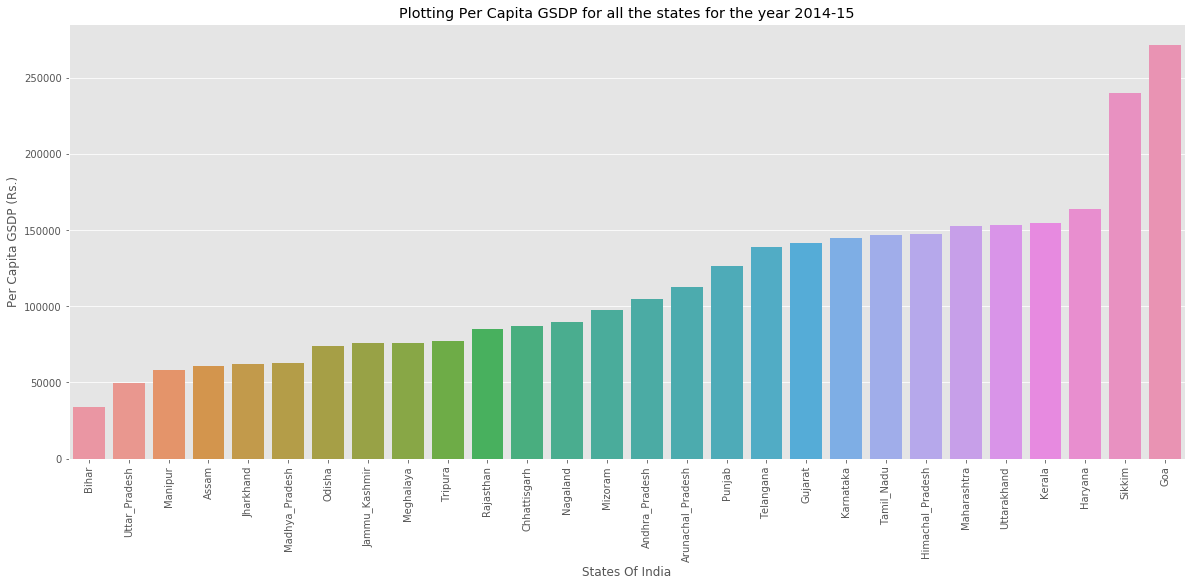

In [101]:
#Plot the GDP per capita for all the states.
import seaborn as sns

df_final.sort_values(by=['Per Capita GSDP (Rs.)'],inplace=True)
plt.figure(figsize=(20,8)) 
sns.barplot(df_final.index,df_final['Per Capita GSDP (Rs.)']) 
plt.xticks(rotation=90)
plt.xlabel('States Of India')
plt.ylabel('Per Capita GSDP (Rs.)')
plt.title("Plotting Per Capita GSDP for all the states for the year 2014-15")
plt.show()

**Bottom 5 states**:
> 1.Bihar              
> 2.Uttar_Pradesh             
> 3.Manipur            
> 4.Assam                
> 5.Jharkhand
<br/><br/>

**top 5 states**:  <br/>                      
> 1.Delhi<br/>
> 2.Goa<br/>
> 3.Chandigarh<br/>
> 4.Sikkim<br/>
> 5.Puducherry<br/>
<br/>

**Ratio of the highest per capita GDP to the lowest per capita GDP**<br/>
> Highest per capita(Delhi)=274041
> Lowest per capita(Bihar)=33954
> Ratio=33954/274041=12.39<br/>
This means the **highest per capita state(Delhi) is having approximately 12 times higher percapita  compared to lowest per capita state(Bihar)**<br/>
<br/>

**Plot the % contribution of the primary, secondary and tertiary sectors as % of the total GDP for all the states:**

> I would prefer using **STACKED BAR PLOT**, since we have groups and subgroups, we probably want to display the subgroups values in a stacked barplot. So that all the data can be compared easily


In [127]:
#Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.
#Percent Stacked Bar Plot

# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

# Data
sector_df=df_final[['Primary','Secondary','Tertiary', 'Gross State Domestic Product', 'Per Capita GSDP (Rs.)']] 

sector_df['Primary %']=round((sector_df['Primary']/sector_df['Gross State Domestic Product'])*100,2)
sector_df['Secondary %']=round((sector_df['Secondary']/sector_df['Gross State Domestic Product'])*100,2)
sector_df['Tertiary %']=round((sector_df['Tertiary']/sector_df['Gross State Domestic Product'])*100,2)
sector_df=sector_df.sort_values('Gross State Domestic Product')
#Plotting
plt.figure(figsize=(20,8)) 
# From raw value to percentage
#totals = [i+j+k for i,j,k in zip(sector_df['Primary'], sector_df['Secondary'], sector_df['Tertiary'])]
Primary = [i / j * 100 for i,j in zip(sector_df['Primary'],sector_df['Gross State Domestic Product'] )]
Secondary = [i / j * 100 for i,j in zip(sector_df['Secondary'], sector_df['Gross State Domestic Product'] )]
Tertiary = [i / j * 100 for i,j in zip(sector_df['Tertiary'], sector_df['Gross State Domestic Product'] )]

# plot
barWidth = 0.95

# Create green Bars
plt.bar(sector_df.index, Primary, color='#b5ffb9', edgecolor='white', width=barWidth, label="Primary")
# Create orange Bars
plt.bar(sector_df.index, Secondary, bottom=Primary, color='#f9bc86', edgecolor='white', width=barWidth, label="Secondary")
# Create blue Bars
plt.bar(sector_df.index, Tertiary, bottom=[i+j for i,j in zip(Primary, Secondary)], color='#a3acff', edgecolor='white', width=barWidth, label="Tertiary")

# Custom x axis
plt.xticks(sector_df.index,rotation=90)
plt.xlabel("States Of India")
plt.ylabel("% GDP Contribution of sectors of all the states")

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Add a title
plt.title("Contribution of the Primary, Secondary and Tertiary sectors as % of the Total GDP for all the states")

# Show graphic
plt.show()

**Why is (Primary + Secondary + Tertiary) not equal to total GDP?**
> Because, **Total GDP=(Primary + Secondary + Tertiary) + Tax - Subsidy**

In [98]:
sector_df

Item                Primary  Secondary  Tertiary  \
section                                            
Mizoram              225598     270072    637619   
Sikkim               138776     845253    483103   
Arunachal_Pradesh    716959     287489    631844   
Manipur              383140     220173   1177334   
Nagaland             616178     212361    992956   
Meghalaya            451050     637942   1200655   
Tripura              942216     484393   1484709   
Goa                  312129    1547536   1738217   
Jammu_Kashmir       1620326    2276132   5613282   
Himachal_Pradesh    1548366    4119162   4133326   
Uttarakhand         1845972    7642865   5587975   
Assam               5326697    4033091   9307109   
Jharkhand           5248354    6241471   8133341   
Chhattisgarh        6400817    8238886   7588778   
Odisha              9009306    8989693  12256258   
Punjab              9296070    7904914  16717805   
Bihar               8019997    5984896  22179969   
Haryana             8040424   12561411  19226568   
Madhya_Pradesh     17854020   10044889  18117360   
Telangana           9133354    9924001  28471410   
Kerala              6489442   12070040  29673778   
Andhra_Pradesh     16303716   10488884  22032942   
Rajasthan          19113780   13028794  26015812   
Gujarat            15887187   33023538  30220377   
Karnataka          12066304   20484404  50490630   
Uttar_Pradesh      25999255   25548724  45968959   
Tamil_Nadu         13329774   32841892  53343788   
Maharashtra        21758383   47445207  88631076   

Item               Gross State Domestic Product  Per Capita GSDP (Rs.)  \
section                                                                  
Mizoram                                 1155933                  97687   
Sikkim                                  1520933                 240274   
Arunachal_Pradesh                       1676119                 112718   
Manipur                                 1804276                  58442   
Nagaland                                1841424                  89607   
Meghalaya                               2440807                  76228   
Tripura                                 2966662                  77358   
Goa                                     4063307                 271793   
Jammu_Kashmir                          10040446                  75840   
Himachal_Pradesh                       10436879                 147330   
Uttarakhand                            16198529                 153076   
Assam                                  19809800                  60621   
Jharkhand                              21710718                  62091   
Chhattisgarh                           23498180                  86860   
Odisha                                 32197092                  73979   
Punjab                                 36801089                 126606   
Bihar                                  37391988                  33954   
Haryana                                43746207                 164077   
Madhya_Pradesh                         48198169                  62989   
Telangana                              51117765                 139035   
Kerala                                 52600230                 154778   
Andhra_Pradesh                         52646842                 104977   
Rajasthan                              61219447                  84837   
Gujarat                                89502727                 141263   
Karnataka                              92178806                 145141   
Uttar_Pradesh                         104337115                  49450   
Tamil_Nadu                            109256373                 146503   
Maharashtra                           179212165                 152853   

Item               Primary %  Secondary %  Tertiary %  
section                                                
Mizoram                19.52        23.36       55.16  
Sikkim                  9.12        55.57       31

[[ 1.         -0.57926538]
 [-0.57926538  1.        ]]


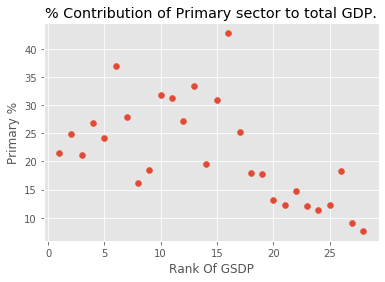

In [128]:
import matplotlib as matplotlib
import seaborn as sns
sector_df=sector_df.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)
sector_df['Rank Of GSDP']= sector_df["Per Capita GSDP (Rs.)"].rank() 

print(np.corrcoef(sector_df['Primary %'], sector_df['Rank Of GSDP']))

%matplotlib inline
matplotlib.style.use('ggplot')
plt.scatter( sector_df['Rank Of GSDP'],sector_df['Primary %'])
plt.xlabel('Rank Of GSDP')
plt.ylabel('Primary %')
plt.title('% Contribution of Primary sector to total GDP.')
plt.show()




###  %contribution of Primary sector to total GDP<br/>
> From the plot, it is clearly evident that as the rank of percapita GDP increases the primary sector's contribution decreases drastically, which leads us to the conclusion that there is a significant correlation between the two. The primary sector is positively contributing towards the increase the percapita GDP <br/><br/>
## Top 3/4/5 sub-sectors:


In [129]:
#Categorise the states into four groups based on the GDP per capita 
subsectors_df=df_final[['Agriculture, forestry and fishing', 'Mining and quarrying','Manufacturing',
'Electricity, gas, water supply & other utility services',
'Construction', 'Trade, repair, hotels and restaurants',
'Transport, storage, communication & services related to broadcasting',
'Financial services',
'Real estate, ownership of dwelling & professional services',
'Public administration', 'Other services','Gross State Domestic Product', 'Per Capita GSDP (Rs.)']]
subsectors_df=subsectors_df.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)
cat4=round(np.percentile(sector_df['Per Capita GSDP (Rs.)'],20),2)
cat3=round(np.percentile(sector_df['Per Capita GSDP (Rs.)'],50),2)
cat2=round(np.percentile(sector_df['Per Capita GSDP (Rs.)'],85),2)
cat1=round(np.percentile(sector_df['Per Capita GSDP (Rs.)'],100),2)
subsectors_df['Tag']=pd.cut(subsectors_df['Per Capita GSDP (Rs.)'], bins=[0,cat4,cat3,cat2,cat1], include_lowest=True, labels=['C4', 'C3', 'C2','C1'])
subsectors_df.head()

Item         Agriculture, forestry and fishing  Mining and quarrying  \
section                                                                
Goa                                     308507                3622.0   
Sikkim                                  137447                1329.0   
Haryana                                8015238               25186.0   
Kerala                                 5930617              558824.0   
Uttarakhand                            1601423              244549.0   

Item         Manufacturing  \
section                      
Goa                1177608   
Sikkim              550697   
Haryana            7756921   
Kerala             4273567   
Uttarakhand        5866252   

Item         Electricity, gas, water supply & other utility services  \
section                                                                
Goa                                                     204110         
Sikkim                                                  212499         
Haryana                                                1101919         
Kerala                                                  482470         
Uttarakhand                                             433880         

Item         Construction  Trade, repair, hotels and restaurants  \
section                                                            
Goa                165819                                 380927   
Sikkim              82058                                  70568   
Haryana           3702571                                4986319   
Kerala            7314003                                8557345   
Uttarakhand       1342733                                1743106   

Item         Transport, storage, communication & services related to broadcasting  \
section                                                                             
Goa                                                     189656                      
Sikkim                                                   47347                      
Haryana                                                2560623                      
Kerala                                                 4020934                      
Uttarakhand                                            1066693                      

Item         Financial services  \
section                           
Goa                      233618   
Sikkim                    21079   
Haryana                 1671486   
Kerala                  2010306   
Uttarakhand              385030   

Item         Real estate, ownership of dwelling & professional services  \
section                                                                   
Goa                                                     407099            
Sikkim                                                   75330            
Haryana                                                6970183            
Kerala                                                 7287633            
Uttarakhand                                             831307            

Item         Public administration  Other services  \
section                                              
Goa                         346486          180431   
Sikkim                      119514          149265   
Haryana                    1036377         2001581   
Kerala                     2068915         5728645   
Uttarakhand                 579409          982430   

Item         Gross State Domestic Product  Per Capita GSDP (Rs.) Tag  
section                                                               
Goa                               4063307                 271793  C1  
Sikkim                            1520933                 240274  C1  
Haryana                          43746207                 164077  C1  
Kerala                           52600230                 154778  C1  
Uttarakhand                      16198529                 153076  C1

In [104]:
cat1=subsectors_df.groupby('Tag').get_group('C1')
cat2=subsectors_df.groupby('Tag').get_group('C2')
cat3=subsectors_df.groupby('Tag').get_group('C3')
cat4=subsectors_df.groupby('Tag').get_group('C4')
def avgsubsectors(cat):
    cat=cat.T    
    cat=cat.drop(['Tag'])
    cat['SumSubSectors']=cat.sum(axis=1).astype(int)
    totalGDP=cat.loc['Gross State Domestic Product','SumSubSectors']
    cat['AvgSubSectors']=(cat['SumSubSectors']/totalGDP)*100
    cat=cat.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'])
    return cat
cat1=avgsubsectors(cat1)
cat2=avgsubsectors(cat2)
cat3=avgsubsectors(cat3)
cat4=avgsubsectors(cat4)

In [130]:
import pprint as pp
catdict={}
def calculatetopsubsector(cat,name):
    catavgsum =0
    catavgrecords=[]
    for i,v in cat['AvgSubSectors'].items():
        if catavgsum < 78 :
            catavgsum+=v
            catavgrecords.append(i)
        else:
            break   
    catdict[name]=catavgrecords
    
calculatetopsubsector(cat1,'cat1')
calculatetopsubsector(cat2,'cat2')
calculatetopsubsector(cat3,'cat3')
calculatetopsubsector(cat4,'cat4')
pp.pprint(dict(catdict))

IndexError: invalid index to scalar variable.

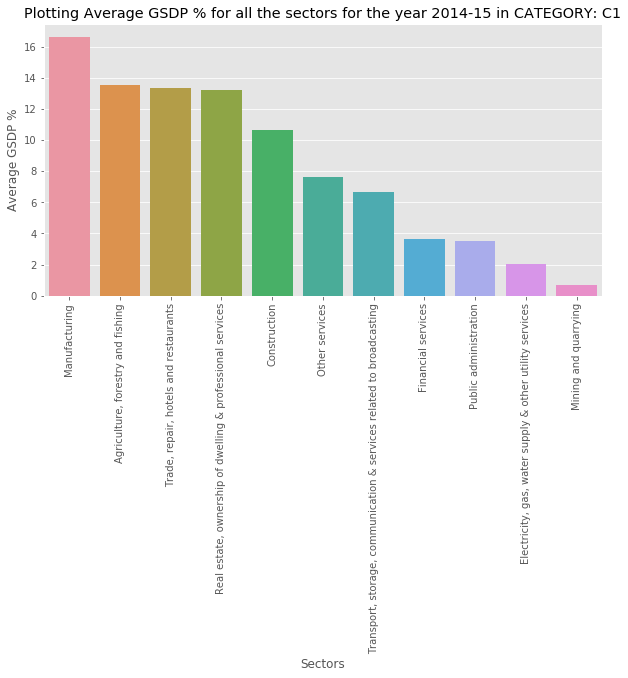

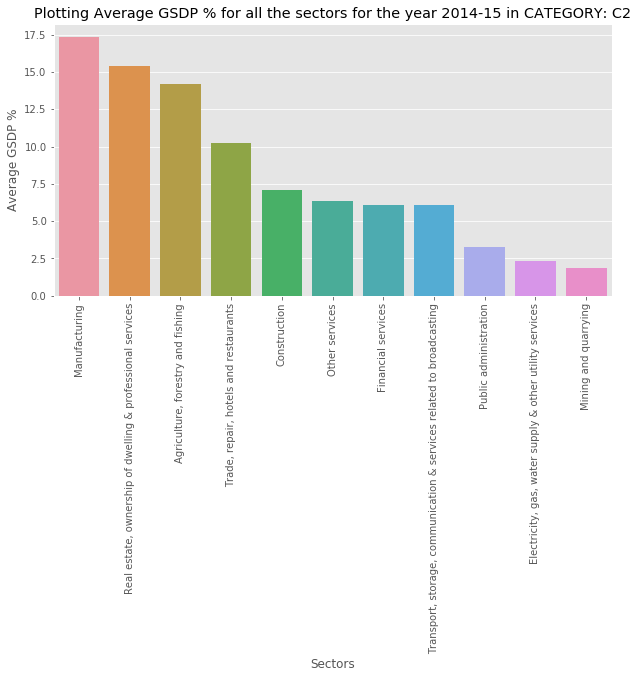

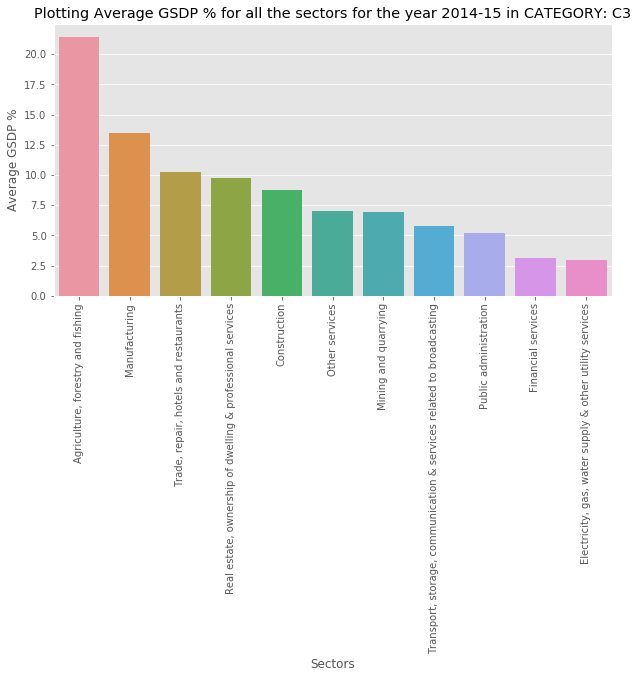

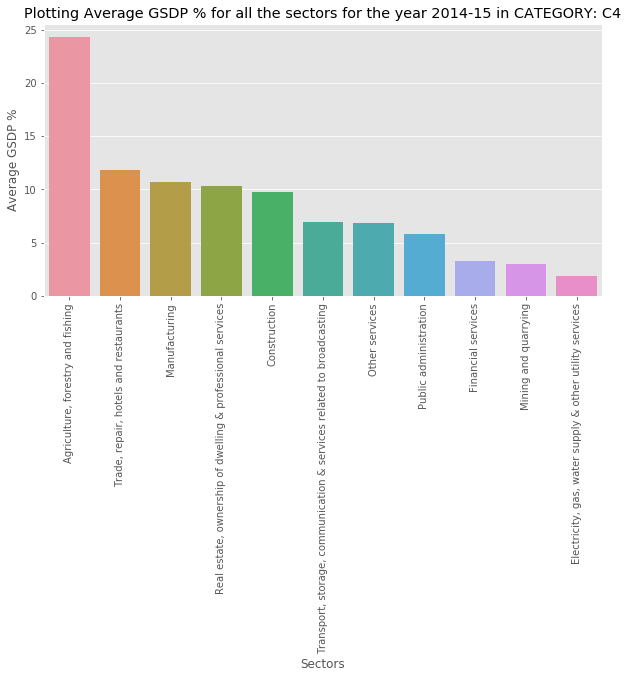

In [105]:
import seaborn as sns
def plotsubsectors(cat,name):
    cat.sort_values(by="AvgSubSectors",ascending=False,inplace=True)
    plt.figure(figsize=(10,5)) 
    sns.barplot(cat.index,cat['AvgSubSectors']) 
    plt.xticks(rotation=90)
    plt.xlabel('Sectors')
    plt.ylabel('Average GSDP %')
    plt.title("Plotting Average GSDP % for all the sectors for the year 2014-15 in CATEGORY: "+name)
    plt.show()
plotsubsectors(cat1,'C1')
plotsubsectors(cat2,'C2')
plotsubsectors(cat3,'C3')
plotsubsectors(cat4,'C4')

# Part-II: GDP and Education Dropout Rates
> # correlation of GDP per capita with dropout rates in education
> -  ### Heatmaps are chosen for analysing this data, since heat maps are good in analysing the correlation between different data

In [106]:
############Data Sourcing##################################
df_EDR=pd.read_csv('state_wise_avg_annual_drop_out_rate.csv')
#Drop Rates Data
df_EDR=df_EDR[['Sl. No.', 'Level of Education - State', 'Primary - 2014-2015.1','Upper Primary - 2014-2015', 'Secondary - 2014-2015']]
#Sectionwise GDP Per capita 
EDR_GDP_df=df_final[['Primary','Secondary','Tertiary', 'Gross State Domestic Product', 'Per Capita GSDP (Rs.)']]
EDR_GDP_df['Primary %']=round((EDR_GDP_df['Primary']/EDR_GDP_df['Gross State Domestic Product'])*100,2)
EDR_GDP_df['Secondary %']=round((EDR_GDP_df['Secondary']/EDR_GDP_df['Gross State Domestic Product'])*100,2)
EDR_GDP_df['Tertiary %']=round((EDR_GDP_df['Tertiary']/EDR_GDP_df['Gross State Domestic Product'])*100,2)
EDR_GDP_df['Level of Education - State']=EDR_GDP_df.index
#Merge both the datasets
EDR=pd.merge(EDR_GDP_df,df_EDR, on='Level of Education - State')

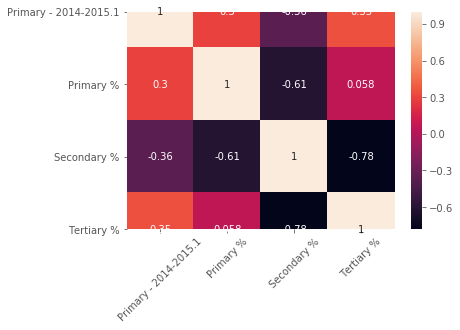

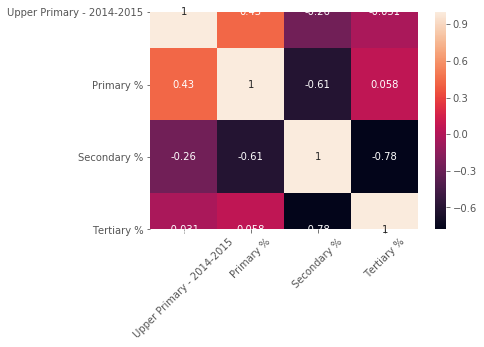

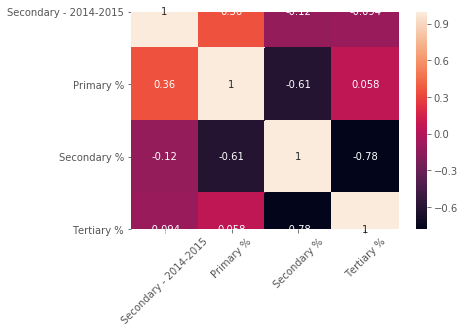

In [131]:
# From the plot, it is clearly evident that as the rank of percapita GDP increases the primary sector's contribution decreases drastically, which leads us to the conclusion that there is a significant negative correlation between the two, leading to the fact that if we need to increase the percapita GDP, we need to move away frfomm the primary sector.


sns.heatmap(EDR[['Primary - 2014-2015.1','Primary %','Secondary %','Tertiary %']].corr(),annot=True)
plt.xticks(rotation=45)
plt.show()
sns.heatmap(EDR[['Upper Primary - 2014-2015','Primary %','Secondary %','Tertiary %']].corr(),annot=True)
plt.xticks(rotation=45)
plt.show()
sns.heatmap(EDR[['Secondary - 2014-2015','Primary %','Secondary %','Tertiary %']].corr(),annot=True)
plt.xticks(rotation=45)
plt.show()
